In [1]:
## 1. prepare the dataset after cleaning 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from scipy import stats
from scipy.stats import ks_2samp

%matplotlib inline

dataset_base_path = r'/Users/kripik123/Documents/dataset/processedx/'

types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [2]:
### 2. gabung all csv files

csv_files = glob.glob(os.path.join(dataset_base_path, '*.csv'))

df = pd.concat((pd.read_csv(f, dtype=types) for f in csv_files))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16232943 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dst_port           uint32 
 1   protocol           uint8  
 2   timestamp          object 
 3   flow_duration      int64  
 4   tot_fwd_pkts       uint32 
 5   tot_bwd_pkts       uint32 
 6   totlen_fwd_pkts    uint32 
 7   totlen_bwd_pkts    uint32 
 8   fwd_pkt_len_max    uint16 
 9   fwd_pkt_len_min    uint16 
 10  fwd_pkt_len_mean   float32
 11  fwd_pkt_len_std    float32
 12  bwd_pkt_len_max    uint16 
 13  bwd_pkt_len_min    uint16 
 14  bwd_pkt_len_mean   float32
 15  bwd_pkt_len_std    float32
 16  flow_byts_s        float64
 17  flow_pkts_s        float64
 18  flow_iat_mean      float32
 19  flow_iat_std       float32
 20  flow_iat_max       int64  
 21  flow_iat_min       int64  
 22  fwd_iat_tot        int64  
 23  fwd_iat_mean       float32
 24  fwd_iat_std        float32
 25  fwd_iat_max      

In [3]:
### 3. cari kolom yang tidak ada nilainya/infinity 
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values ['flow_byts_s', 'flow_pkts_s']


In [5]:
## ganti kolom yang tidak ada nilainya dengan nan
for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

In [6]:
### 3. cek apakah masih ada kolo yang tidak ada nilainya
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values []


## Label Creation

In [8]:
##To analyze the dataset in terms of binary classification (benign/attack) and multi-classification (benign/attack-type) addtional label columns are created:

## 1. label_is_attack specifies if a network flow represents a benign or an malicious flow.
## 2. label_is_attack_[attack_type] specifies if a network flow represents a certain type of attack.

df['label'] = df.label.astype('category')
df['label_code'] = df['label'].cat.codes
df['label_is_attack'] = df.label.apply(lambda x: 0 if x == 'Benign' else 1)

attack_types = [a for a in df.label.value_counts().index.tolist() if a != 'Benign']

for a in attack_types:
    l = 'label_is_attack_' + a.replace('-', ' ').replace(' ', '_').lower()
    df[l] = df.label.apply(lambda x: 1 if x == a else 0)

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16232943 entries, 0 to 1048574
Data columns (total 96 columns):
 #   Column                                    Non-Null Count     Dtype   
---  ------                                    --------------     -----   
 0   dst_port                                  16232943 non-null  uint32  
 1   protocol                                  16232943 non-null  uint8   
 2   timestamp                                 16232943 non-null  object  
 3   flow_duration                             16232943 non-null  int64   
 4   tot_fwd_pkts                              16232943 non-null  uint32  
 5   tot_bwd_pkts                              16232943 non-null  uint32  
 6   totlen_fwd_pkts                           16232943 non-null  uint32  
 7   totlen_bwd_pkts                           16232943 non-null  uint32  
 8   fwd_pkt_len_max                           16232943 non-null  uint16  
 9   fwd_pkt_len_min                           16232943 non-n

## 1. Number of benign network flows in relation to malicious flows

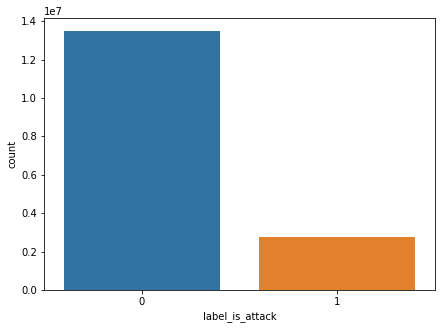

In [10]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='label_is_attack', data=df, order = df['label_is_attack'].value_counts().index, ax=ax)

In [11]:
df_is_attack = df.groupby('label_is_attack').agg({'label_is_attack':'first', 'label_is_attack':'count'}).rename_axis(None).sort_values('label_is_attack', ascending=False)
df_is_attack['percentage'] = df_is_attack / df_is_attack.loc[:'label_is_attack'].sum()
df_is_attack

,label_is_attack,percentage
0,13484708,0.8307
1,2748235,0.1693


## 2. Number of flows per attack type

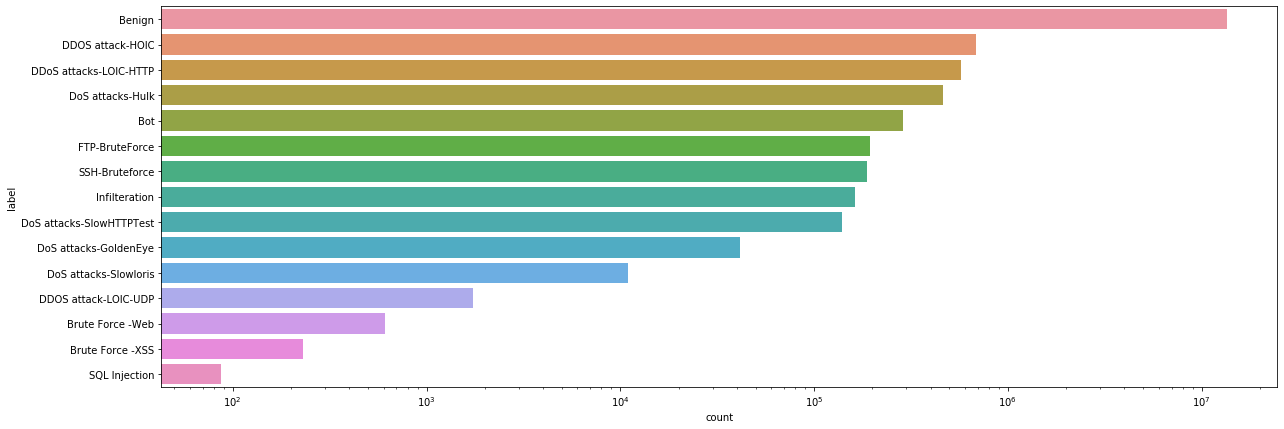

In [12]:
f, ax = plt.subplots(figsize=(20, 7))
ax.set(xscale='log')
sns.countplot(y='label', data=df, order = df['label'].value_counts().index, ax=ax)

In [13]:
df.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)

,label
Benign,13484708
DDOS attack-HOIC,686012
DDoS attacks-LOIC-HTTP,576191
DoS attacks-Hulk,461912
Bot,286191
FTP-BruteForce,193360
SSH-Bruteforce,187589
Infilteration,161934
DoS attacks-SlowHTTPTest,139890
DoS attacks-GoldenEye,41508


## 3. Feature correlations